In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Parsing the data from the csv file into a table
dataFrame = pd.DataFrame(pd.read_csv("/Users/gaurwik/Documents/Science_Fair_2023/calenviroscreen-3.0-results-june-2018-update.csv"))

#Printing the table
numeric_only = dataFrame._get_numeric_data()
numeric_only

,Census Tract,Total Population,ZIP,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,93706,-119.781696,36.709695,94.09,100.00,0.065,98.18,15.400000,...,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
1,6071001600,6133,91761,-117.618013,34.057780,90.68,99.99,0.062,91.10,13.310000,...,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
2,6019000200,3167,93706,-119.805504,36.735491,85.97,99.97,0.062,91.10,15.400000,...,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
3,6077000801,6692,95203,-121.314524,37.940517,82.49,99.96,0.046,53.02,12.540000,...,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.72
4,6019001500,2206,93725,-119.717843,36.681600,82.03,99.95,0.065,98.18,15.400000,...,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,6009000504,942,95223,-120.211151,38.405130,NaN,NaN,0.055,77.87,4.645934,...,NaN,24.7,35.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8031,6065940100,166,92239,-114.475335,34.000183,NaN,NaN,0.044,40.49,9.945784,...,NaN,21.0,28.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8032,6053011502,1710,93923,-121.735102,36.301079,NaN,NaN,0.035,16.94,3.991772,...,10.76,29.0,43.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8033,6083980100,11,57,-120.048221,33.948186,NaN,NaN,0.040,25.87,9.536303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Creating the correlation matrix from the data table
corr = dataFrame.corr()

<AxesSubplot:>

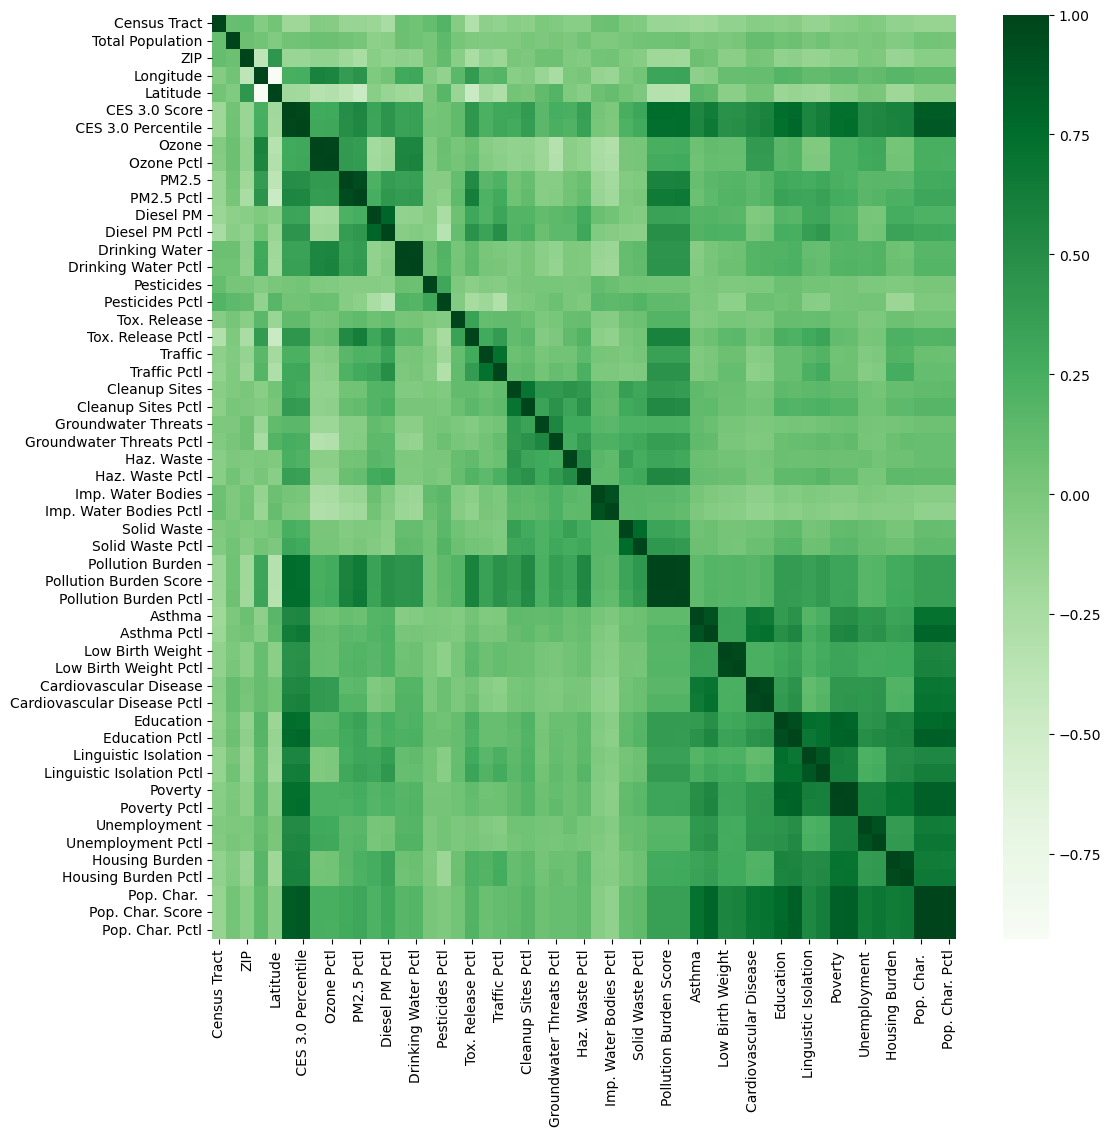

In [4]:
#plotting the correlation matrix with with colors
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corr, cmap="Greens",annot=False)

In [12]:
#Utility method used for removing the pairs with correlated metrics that aren't important or are correlated with themself
def isExcluded(row):
    excludedWords = {"Score", "Pctl", "CES 3.0", "Pop. Char.", "Longitude", "Latitude", "Housing Burden", "Pollution Burden"}
    for i in excludedWords:
        if (i in row[0][0] or i in row[0][1]):
            return False
    
    return row[0][0] != row[0][1]

In [13]:
#removing duplicates and sorting the pairs in decreasing order by correlation score
c1 = corr.abs().unstack()
c1 = c1.drop_duplicates()
c1 = c1.sort_values(ascending=False)

#Creating a new data table of correlated pairs sorted by score
oldDf = pd.DataFrame(c1)
df = pd.Series
first = True
for row in oldDf.iterrows():
    if (isExcluded(row)):
        x = pd.Series([row[0][0], row[0][1], row[1]])
        if (first):
            df = x
            first = False
        else:
            df = pd.concat([df, x], axis = 1, ignore_index=True)

df = pd.DataFrame(df)
df = df.transpose()
display(df)

,0,1,2
0,Education,Poverty,"0 0.819775 Name: (Education, Poverty), dtyp..."
1,Education,Linguistic Isolation,"0 0.736859 Name: (Education, Linguistic Iso..."
2,Asthma,Cardiovascular Disease,"0 0.663415 Name: (Asthma, Cardiovascular Di..."
3,Linguistic Isolation,Poverty,"0 0.616986 Name: (Linguistic Isolation, Pov..."
4,Poverty,Unemployment,"0 0.597475 Name: (Poverty, Unemployment), d..."
...,...,...,...
226,Total Population,Asthma,"0 0.002285 Name: (Total Population, Asthma)..."
227,Traffic,Solid Waste,"0 0.001538 Name: (Traffic, Solid Waste), dt..."
228,Total Population,Low Birth Weight,"0 0.001339 Name: (Total Population, Low Bir..."
229,Total Population,Poverty,"0 0.001189 Name: (Total Population, Poverty..."


In [14]:
#all the different metrics
print(set(df[0]))

{'Asthma', 'Haz. Waste', 'Traffic', 'Drinking Water', 'Low Birth Weight', 'Diesel PM', 'Groundwater Threats', 'Total Population', 'Poverty', 'PM2.5', 'Ozone', 'Linguistic Isolation', 'ZIP', 'Education', 'Cardiovascular Disease', 'Imp. Water Bodies', 'Census Tract', 'Cleanup Sites', 'Solid Waste', 'Pesticides', 'Tox. Release'}


In [15]:
#10 most correlated data
print(df[0:10:1])

                        0                       1  \
0               Education                 Poverty   
1               Education    Linguistic Isolation   
2                  Asthma  Cardiovascular Disease   
3    Linguistic Isolation                 Poverty   
4                 Poverty            Unemployment   
5                   Ozone          Drinking Water   
6                  Asthma                 Poverty   
7           Cleanup Sites              Haz. Waste   
8               Education            Unemployment   
9  Cardiovascular Disease            Unemployment   

                                                   2  
0  0    0.819775
Name: (Education, Poverty), dtyp...  
1  0    0.736859
Name: (Education, Linguistic Iso...  
2  0    0.663415
Name: (Asthma, Cardiovascular Di...  
3  0    0.616986
Name: (Linguistic Isolation, Pov...  
4  0    0.597475
Name: (Poverty, Unemployment), d...  
5  0    0.556655
Name: (Ozone, Drinking Water), d...  
6  0    0.487867
Name: (Asthma,

In [16]:
#10 least correlated data
print(df[-10::1])

                     0                    1  \
221  Imp. Water Bodies         Unemployment   
222                ZIP         Unemployment   
223         Pesticides               Asthma   
224       Census Tract  Groundwater Threats   
225                ZIP        Cleanup Sites   
226   Total Population               Asthma   
227            Traffic          Solid Waste   
228   Total Population     Low Birth Weight   
229   Total Population              Poverty   
230         Pesticides           Haz. Waste   

                                                     2  
221  0    0.005826
Name: (Imp. Water Bodies, Unempl...  
222  0    0.004765
Name: (ZIP, Unemployment), dtype...  
223  0    0.004315
Name: (Pesticides, Asthma), dtyp...  
224  0    0.003269
Name: (Census Tract, Groundwater...  
225  0    0.002367
Name: (ZIP, Cleanup Sites), dtyp...  
226  0    0.002285
Name: (Total Population, Asthma)...  
227  0    0.001538
Name: (Traffic, Solid Waste), dt...  
228  0    0.001339
Name: (

In [17]:
#Parsing the income metrics for each zipcode into a data table
incomeDf = pd.DataFrame(pd.read_csv("/Users/gaurwik/Documents/Science_Fair_2023/Personal_Income_Tax_Statistics_By_Zip_Code.csv"))
incomeDf

,Taxable Year,Zip Code,State,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,2020,92137,CA,San Diego,San Diego,188,38663083,3084980,32.789640,-117.193658,POINT (-117.1936577 32.78964014),POINT (-117.16171 32.71568),NaN
1,2020,94557,CA,Hayward,Alameda,107,5104485,159000,37.720226,-122.164352,POINT (-122.1643521 37.72022591),POINT (-122.08556 37.67134),NaN
2,2020,93005,CA,Ventura,Ventura,227,16117556,899344,34.277091,-119.217850,POINT (-119.2178496 34.27709072),POINT (-119.29232 34.28082),NaN
3,2020,93227,CA,Goshen,Tulare,354,23665658,1764599,36.282543,-118.265210,POINT (-118.2652098 36.28254312),POINT (-85.83695 41.58918),NaN
4,2020,93523,CA,Edwards,Kern,693,30550251,907583,35.376768,-118.807357,POINT (-118.8073572 35.37676773),POINT (-117.93907 34.92778),POINT (-117.93907 34.92778)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68583,1998,95009,CA,CampBell,Santa Clara,402,18980130,881246,37.234238,-121.731723,POINT (-121.7317226 37.23423826),POINT (-121.94487 37.2889),NaN
68584,1995,92375,CA,Redlands,San Bernardino,521,32684197,1996312,34.522586,-115.537257,POINT (-115.5372574 34.52258599),POINT (-117.18259 34.05538),NaN
68585,1995,95812,CA,Sacramento,Sacramento,553,18338511,724751,38.192378,-121.602064,POINT (-121.6020643 38.1923781),POINT (-121.49085 38.57944),NaN
68586,1997,91786,CA,Upland,San Bernardino,17749,591798095,17299972,34.522586,-115.537257,POINT (-115.5372574 34.52258599),POINT (-117.65101 34.0994),POINT (-117.658449 34.104502)


In [6]:
#Combining the zipcode metrics for data with zipcode metrics for pollution and health.
dataFrame = dataFrame.join(incomeDf, how='left', lsuffix='_left', rsuffix='_right')
dataFrame

#Saving the complete data table as a csv file
dataFrame.to_csv("calenviroscreen_results_june_2018_and_Personal_Income_Tax_Statistics_By_Zip_Code.csv")
dataFrame.to_csv("/Users/gaurwik/Documents/Science_Fair_2023/calenviroscreen_results_june_2018_and_Personal_Income_Tax_Statistics_By_Zip_Code.csv")


,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),...,San Diego,San Diego,188,38663083,3084980,32.789640,-117.193658,POINT (-117.1936577 32.78964014),POINT (-117.16171 32.71568),NaN
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),...,Hayward,Alameda,107,5104485,159000,37.720226,-122.164352,POINT (-122.1643521 37.72022591),POINT (-122.08556 37.67134),NaN
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,95-100% (highest scores),...,Ventura,Ventura,227,16117556,899344,34.277091,-119.217850,POINT (-119.2178496 34.27709072),POINT (-119.29232 34.28082),NaN
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,95-100% (highest scores),...,Goshen,Tulare,354,23665658,1764599,36.282543,-118.265210,POINT (-118.2652098 36.28254312),POINT (-85.83695 41.58918),NaN
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,95-100% (highest scores),...,Edwards,Kern,693,30550251,907583,35.376768,-118.807357,POINT (-118.8073572 35.37676773),POINT (-117.93907 34.92778),POINT (-117.93907 34.92778)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,6009000504,942,Calaveras,95223,Arnold,-120.211151,38.405130,NaN,NaN,NaN,...,Big Oak Flat,Tuolumne,173,5906471,108686,37.963860,-119.892073,POINT (-119.8920735 37.96385957),POINT (-120.2573 37.82404),POINT (-120.2573 37.82404)
8031,6065940100,166,Riverside,92239,Desert Center,-114.475335,34.000183,NaN,NaN,NaN,...,Van Nuys,Los Angeles,63,3839633,151430,34.059483,-118.242048,POINT (-118.242048 34.0594833),POINT (-118.448097 34.186699),NaN
8032,6053011502,1710,Monterey,93923,Carmel,-121.735102,36.301079,NaN,NaN,NaN,...,Planada,Merced,1718,47944431,527280,37.132424,-120.716752,POINT (-120.7167521 37.1324242),POINT (-120.323773 37.293766),POINT (-120.32147 37.29538)
8033,6083980100,11,Santa Barbara,57,Channel Islands,-120.048221,33.948186,NaN,NaN,NaN,...,Northridge,Los Angeles,17284,1765663555,92144946,34.059483,-118.242048,POINT (-118.242048 34.0594833),POINT (-118.53385 34.23512),POINT (-118.5613 34.28027)
